In [1]:
import pandas as pd

df = pd.read_csv('housing.csv', usecols = ['longitude', 'latitude', 'median_house_value'])
df.head()

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0


* longitude: A value representing how far west a house is. Higher values represent houses that are further West.


* latitude: A value representing how far north a house is. Higher values represent houses that are further north.


* median_house_value: The median house price within a block measured in USD. 

<h3>Visualize the Data</h3>

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

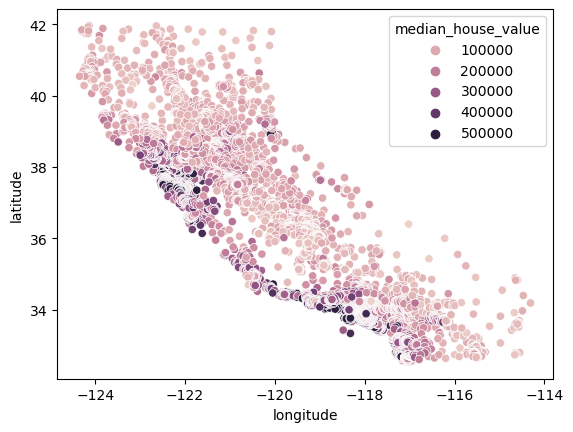

In [2]:
import seaborn as sns

sns.scatterplot(data = df, x = 'longitude', y = 'latitude', hue = 'median_house_value')

<h3>Normalizing the Data</h3>

In [3]:
X = df[['latitude', 'longitude']]
y = df[['median_house_value']]

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=0)

In [5]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

<h3>Training the model</h3>

In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, random_state = 0)
kmeans.fit(X_train_norm)

KMeans(n_clusters=2, random_state=0)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

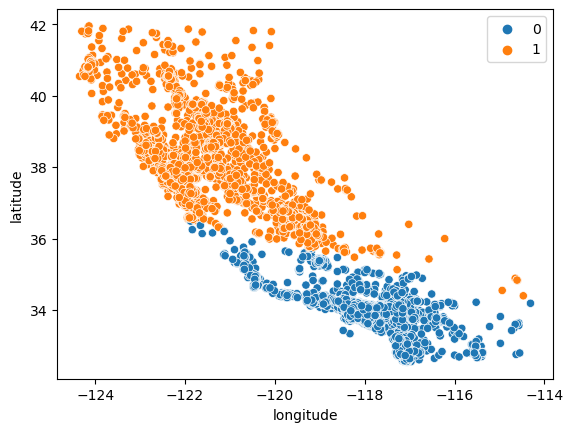

In [16]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = kmeans.labels_)

the data are now clearly split into 3 distinct groups

In [11]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

0.749937192070355

<h3>Choosing the best number of clusters</h3>

In [12]:
K = range(2, 8)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0)
    model.fit(X_train_norm)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

In [13]:
fits

[KMeans(n_clusters=2, random_state=0),
 KMeans(n_clusters=3, random_state=0),
 KMeans(n_clusters=4, random_state=0),
 KMeans(n_clusters=5, random_state=0),
 KMeans(n_clusters=6, random_state=0),
 KMeans(n_clusters=7, random_state=0)]

In [14]:
score

[0.7754128527515258,
 0.749937192070355,
 0.6720696983328215,
 0.6406818824297297,
 0.6584239026094038,
 0.6413574797159075]

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

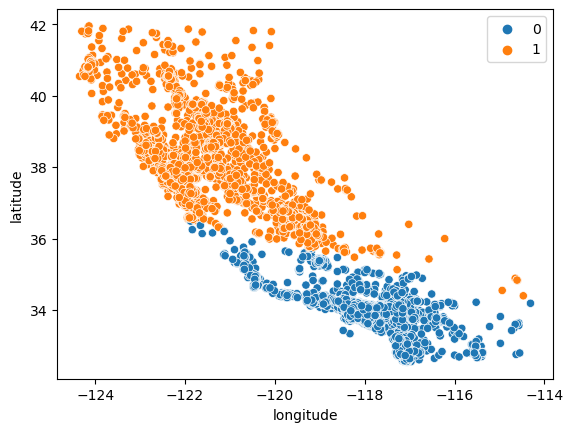

In [17]:
# k=2
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[0].labels_)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

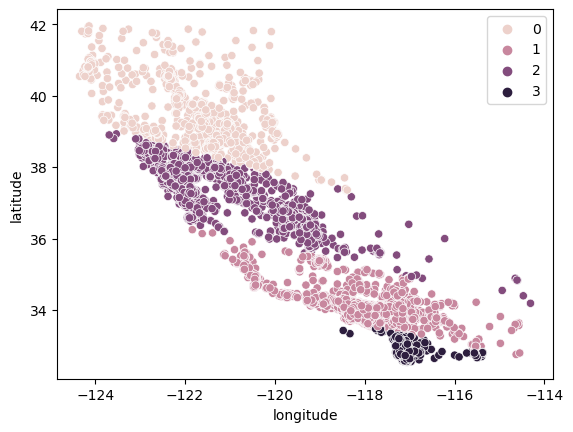

In [18]:
#k=4
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[2].labels_)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

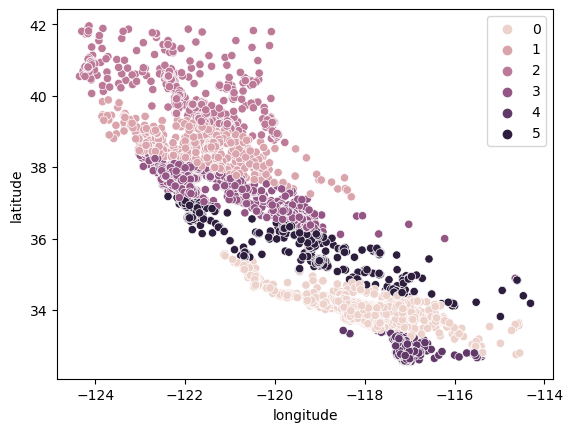

In [19]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[4].labels_)

<AxesSubplot:>

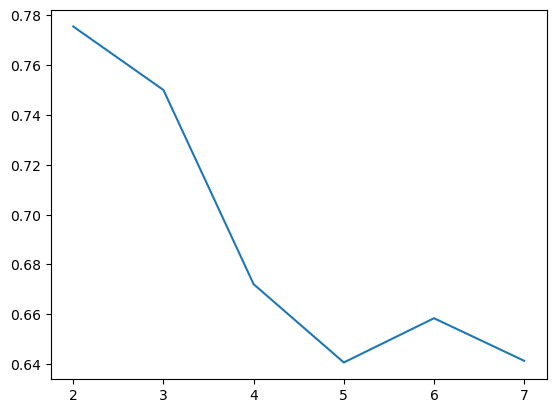

In [20]:
sns.lineplot(x = K, y = score)

* As we increase the value of K, we see improvements in clusters and what they represent until a certain point.

* We then start to see diminishing returns or even worse performance.